In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import scipy.stats as stat
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import files
uploaded = files.upload()

Saving ToyotaCorolla.csv to ToyotaCorolla.csv


In [3]:
raw_data = pd.read_csv('ToyotaCorolla.csv',encoding='latin1')
raw_data.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [4]:
raw_data.shape

(1436, 38)

In [5]:
# Lets consider only the columns which are to be considered for our model as given in the question
raw_data = raw_data[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
raw_data

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


#Apply EDA

In [6]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [7]:
raw_data.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


In [8]:
raw_data.isna().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [9]:
raw_data1 = raw_data.rename({'Age_08_04':'Age','cc':'CC','Quarterly_Tax':'QT'},axis=1)
raw_data1.head()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [10]:
# Drop any duplicated rows
raw_data1[raw_data1.duplicated()]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [11]:
raw_data1=raw_data1.drop_duplicates().reset_index(drop=True)
raw_data1[raw_data1.duplicated()]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight


In [12]:
#Check correlation
raw_data1.corr()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
CC,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
QT,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


#Raw Data Model

In [13]:
model_raw = smf.ols("Price~Age+KM+Weight+HP+CC+Gears+QT+Doors", data = raw_data1).fit()

# Finding rsquared values
model_raw.rsquared, model_raw.rsquared_adj

(0.8625200256947, 0.8617487495415146)

In [14]:
# Finding Accuracy
model_raw.rsquared, model_raw.aic

(0.8625200256947, 24750.407207346932)

We can see that the r_squared value is good but accuracy is low. 

#Calculating VIF

In [15]:
rsq_profit = smf.ols('Price~Age+KM+Weight+HP+CC+Gears+QT+Doors',data=raw_data1).fit().rsquared  
vif_profit = 1/(1-rsq_profit) # 16.33

# Storing vif values in a data frame
p1 = {'Variables':['profit'],'VIF':[vif_profit]}
Vif_frame = pd.DataFrame(p1)  
Vif_frame

,Variables,VIF
0,profit,7.273787


#Residual Analysis

Text(0.5, 1.0, 'Q-Q plot of residuals')

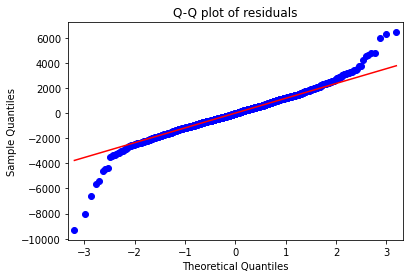

In [16]:
#Test for Normality of Residuals (Q-Q Plot)
qqplot=sm.qqplot(model_raw.resid,line='q')
plt.title("Q-Q plot of residuals")

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


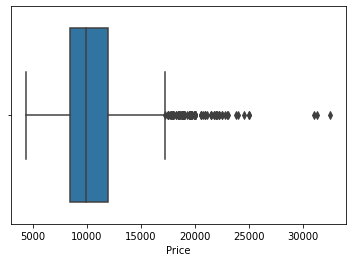

In [17]:
# Check for outlier
sns.boxplot(raw_data1['Price'])
plt.show()

In [18]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

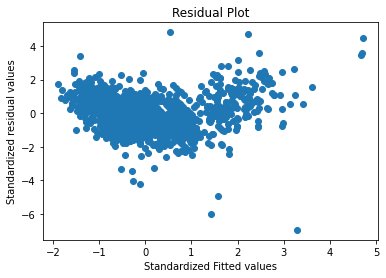

In [19]:
plt.scatter(get_standardized_values(model_raw.fittedvalues),
            get_standardized_values(model_raw.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

#Detecting Outliers/Influencers in the raw model

Using Cook's Distance

In [20]:
model_influence = model_raw.get_influence()
(c, _) = model_influence.cooks_distance

<ipython-input-21-e83318c07220>:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(raw_data1)), np.round(c, 3))


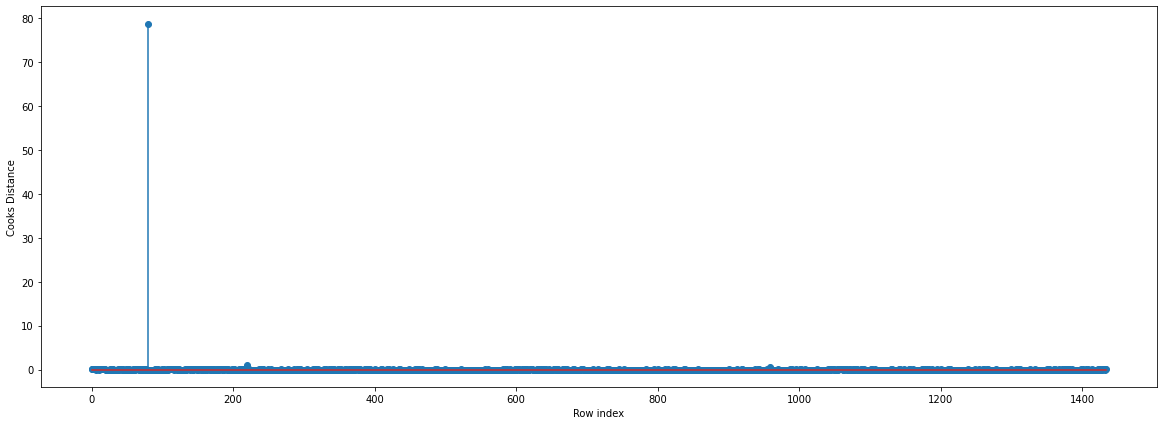

In [21]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(raw_data1)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [22]:
#Lets find out the quartile ranges
Q1 = np.quantile(raw_data1.Price,0.25)
Q3 = np.quantile(raw_data1.Price,0.75)
M = np.median(raw_data1.Price)
IQR = Q3 - Q1
UW = Q3+(1.5*IQR)
LW = Q1-(1.5*IQR)
print('First Quantile=', Q1,'\n' 'Second Quantile=', M,'\n' 'Third Quantile=', Q3,'\n'
      'Inter Quartile Range=', IQR,'\n' 'Upper Whisker=', UW,'\n' 'Lower Whisker=', LW)

First Quantile= 8450.0 
Second Quantile= 9900.0 
Third Quantile= 11950.0 
Inter Quartile Range= 3500.0 
Upper Whisker= 17200.0 
Lower Whisker= 3200.0


In [23]:
# Index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(80, 78.72950582254255)

In [24]:
print('The outlier is present in the boxplot :',np.argmax(c))

The outlier is present in the boxplot : 80


Find out Discrete & Continuous Features in our dataset

In [25]:
discrete_features = [feature for feature in raw_data1.columns if len(raw_data1[feature].unique())<20 and feature]
print('Discrete Features Count: {}'.format(len(discrete_features)), 
      '\nDiscrete Features: ',discrete_features )

Discrete Features Count: 5 
Discrete Features:  ['HP', 'CC', 'Doors', 'Gears', 'QT']


In [26]:
continuous_features =[feature for feature in raw_data1.columns if raw_data1[feature].dtype!='O' and feature not in discrete_features]
print('Continuous Features Count {}'.format(len(continuous_features)),
      '\nContinuous Features: ',continuous_features )

Continuous Features Count 4 
Continuous Features:  ['Price', 'Age', 'KM', 'Weight']


Relationship between continuous features and Price

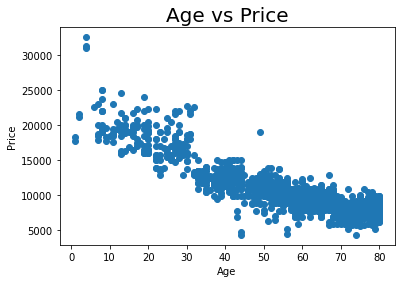

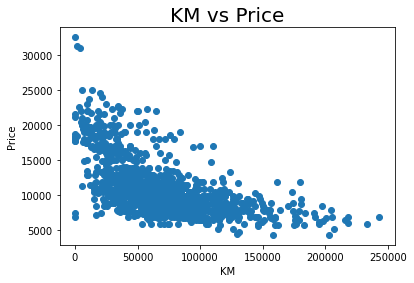

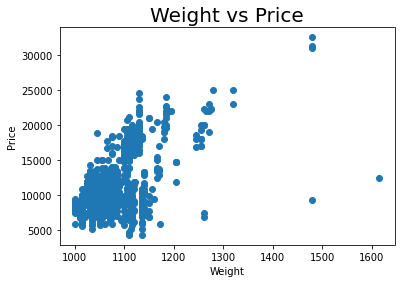

In [27]:
for feature in continuous_features:
    if feature!="Price":       
        plt.scatter(raw_data1[feature],raw_data1['Price'])
        plt.xlabel(feature)
        plt.ylabel('Price')
        plt.title(feature + ' vs Price', size = 20)
        plt.show()

Relationship between discrete features and Price

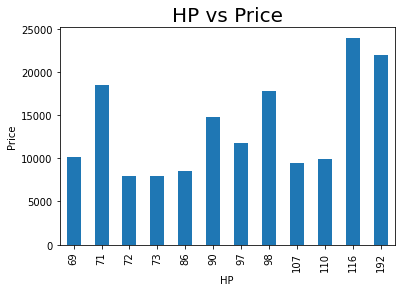

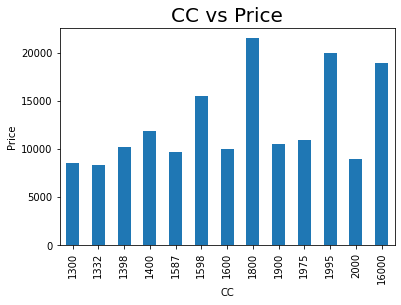

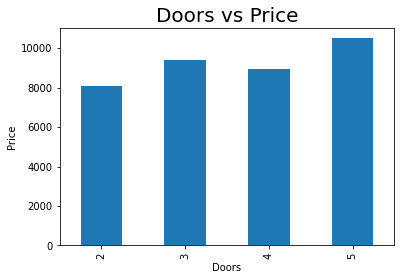

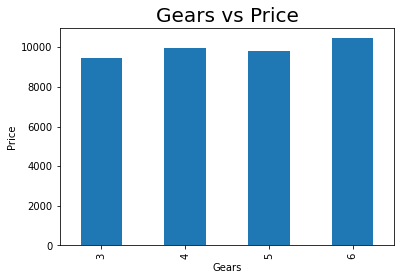

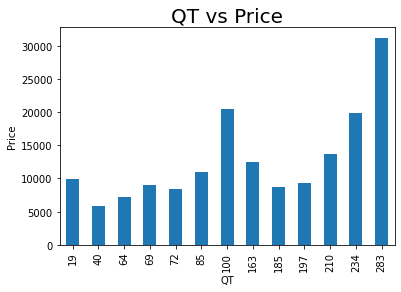

In [28]:
for feature in discrete_features:
    raw_data1.groupby(feature)["Price"].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel("Price")
    plt.title(feature + ' vs Price', size = 20)
    plt.show()

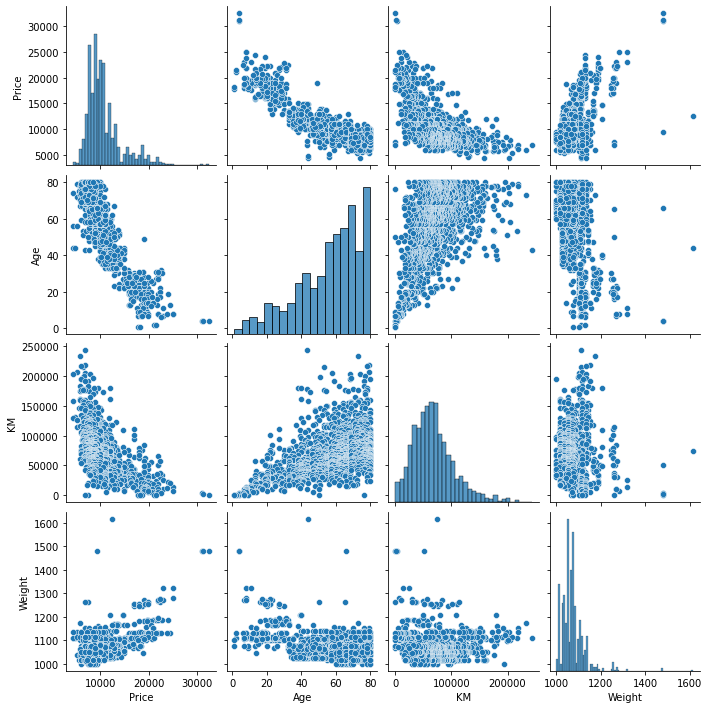

In [29]:
# Collinearity Check
sns.pairplot(raw_data1[continuous_features])
plt.show()

Check for Outliers/Influencers in our data

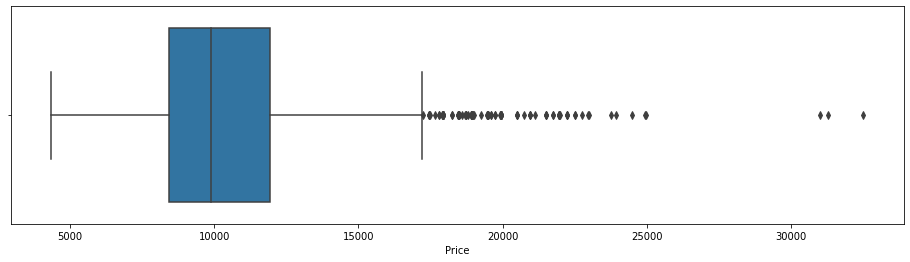

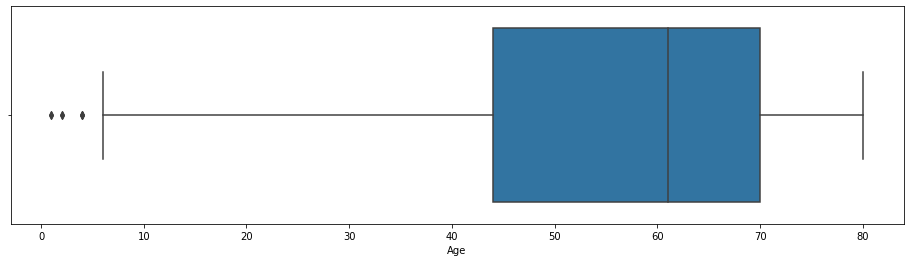

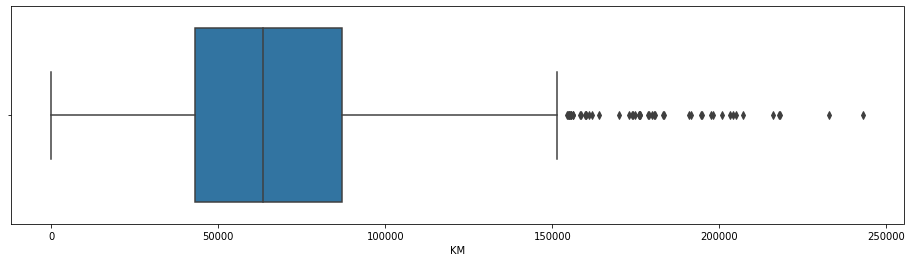

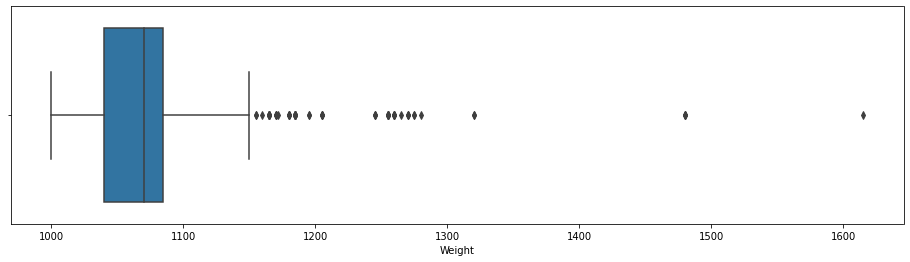

<Figure size 1152x288 with 0 Axes>

In [30]:
plt.figure(figsize=(16,4))
sns.boxplot(x='Price',data=raw_data1)
plt.figure(figsize=(16,4))
sns.boxplot(x='Age',data=raw_data1)
plt.figure(figsize=(16,4))
sns.boxplot(x='KM',data=raw_data1)
plt.figure(figsize=(16,4))
sns.boxplot(x='Weight',data=raw_data1)
plt.figure(figsize=(16,4))

plt.show()

As we can see there's a huge amount of outliers present in each continuous feature. If we remove all the outliers there would be loss of data and we wont get the correct results.
We need to apply different types of transformation and select the one with best results.

#Handling Outliers

**1) Mean Imputation Method**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


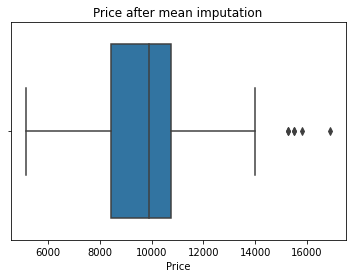

In [31]:
data1 = raw_data1.copy()
for i in data1['Price']:
    Q1 = np.quantile(data1.Price,0.25)
    Q3 = np.quantile(data1.Price,0.75)
    M = np.median(data1.Price)
    IQR = Q3 - Q1
    UW = Q3+(1.5*IQR)
    LW = Q1-(1.5*IQR)
    if i > UW or i < LW:
        data1['Price'] = data1['Price'].replace(i, np.median(data1['Price']))
sns.boxplot(data1['Price'])
plt.title('Price after mean imputation')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


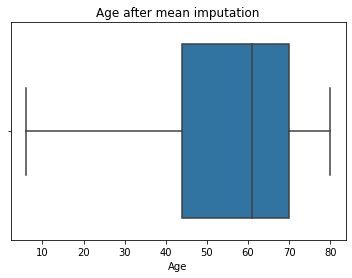

In [32]:
for i in data1['Age']:
    q1 = np.quantile(data1.Age,0.25)
    q3 = np.quantile(data1.Age,0.75)
    med = np.median(data1.Age)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        data1['Age'] = data1['Age'].replace(i, np.mean(data1['Age']))
sns.boxplot(data1['Age'])
plt.title('Age after mean imputation')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


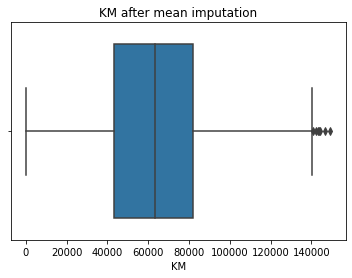

In [33]:
for i in data1['KM']:
    q1 = np.quantile(data1.KM,0.25)
    q3 = np.quantile(data1.KM,0.75)
    med = np.median(data1.KM)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        data1['KM'] = data1['KM'].replace(i, np.mean(data1['KM']))
sns.boxplot(data1['KM'])
plt.title('KM after mean imputation')
plt.show()


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


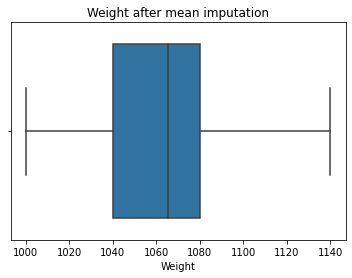

In [34]:
for i in data1['Weight']:
    q1 = np.quantile(data1.Weight,0.25)
    q3 = np.quantile(data1.Weight,0.75)
    med = np.median(data1.Weight)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        data1['Weight'] = data1['Weight'].replace(i, np.mean(data1['Weight']))
sns.boxplot(data1['Weight'])
plt.title('Weight after mean imputation')
plt.show()

Build a model with mean imputation model

In [35]:
model_mi = smf.ols("Price~Age+KM+Weight", data = data1).fit()

# Test for R_squared values
model_mi.rsquared , model_mi.rsquared_adj 

(0.3426073583936887, 0.3412291767551011)

In [36]:
# Test for accuracy
model_mi.rsquared , model_mi.aic

(0.3426073583936887, 24971.683629018906)

As we can see the R_squared value & accuracy is way below par. So we discard this & try different methods.

**2) Removed Outlier Method**

In [37]:
data2 = raw_data1.copy()
def removed_outliers(data, field_name):
    iqr = 1.5*(np.percentile(data[field_name], 75) - np.percentile(data[field_name], 25))
    data.drop(data[data[field_name] > (iqr + np.percentile(data[field_name], 75))].index, inplace=True)
    data.drop(data[data[field_name] < (np.percentile(data[field_name], 25) - iqr)].index, inplace=True)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Price after removing outliers')

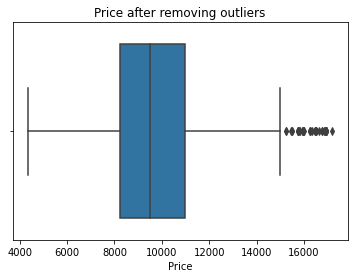

In [38]:
removed_outliers(data2, 'Price')
sns.boxplot(data2.Price)
plt.title('Price after removing outliers')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Age after removing outliers')

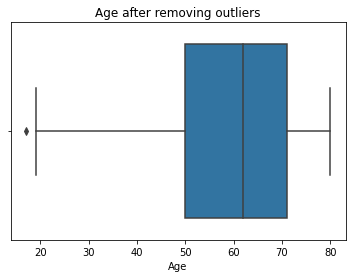

In [39]:
removed_outliers(data2, 'Age')
sns.boxplot(data2.Age)
plt.title('Age after removing outliers')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'KM after removing outliers')

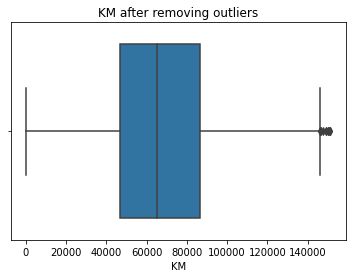

In [40]:
removed_outliers(data2, 'KM')
sns.boxplot(data2.KM)
plt.title('KM after removing outliers')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Weight after removing outliers')

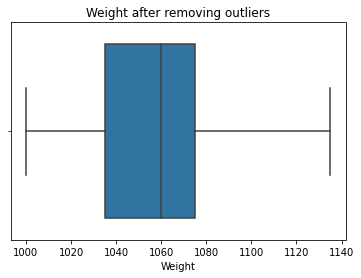

In [41]:
removed_outliers(data2, 'Weight')
sns.boxplot(data2.Weight)
plt.title('Weight after removing outliers')

Build a model with removed outlier model

In [42]:
model_ro = smf.ols("Price~Age+KM+Weight", data = data2).fit()

# Test for R_squared values
model_ro.rsquared , model_ro.rsquared_adj 

(0.7776886294411589, 0.7771455234870249)

In [43]:
# Test for accuracy
model_ro.rsquared , model_ro.aic

(0.7776886294411589, 20664.611682195253)

As we can see the R_squared value & accuracy is good in removed outlier model. So we keep this & try different methods for better results.

#Apply Transformations

1) Square root Transformations

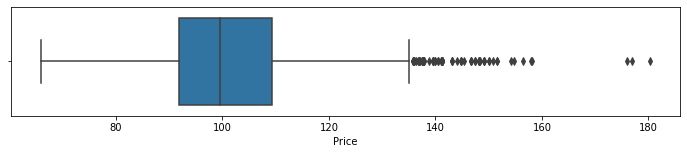

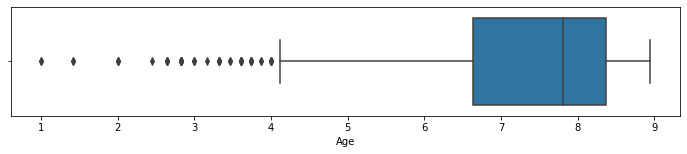

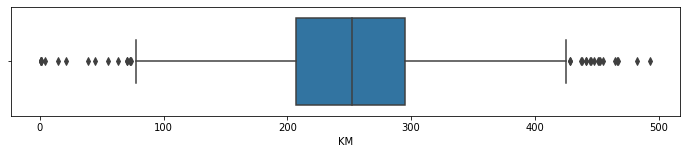

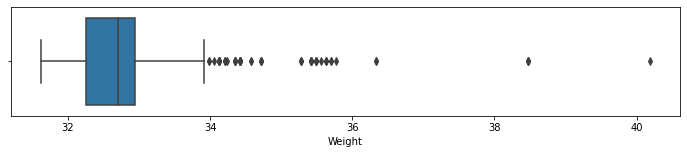

In [44]:
data3 = raw_data1.copy()
data3[continuous_features]=np.sqrt(data3[continuous_features])

plt.figure(figsize=(12,2))
sns.boxplot(x='Price',data=data3)
plt.figure(figsize=(12,2))
sns.boxplot(x='Age',data=data3)
plt.figure(figsize=(12,2))
sns.boxplot(x='KM',data=data3)
plt.figure(figsize=(12,2))
sns.boxplot(x='Weight',data=data3)
plt.show()

Build a model with Square Root Transformations

In [45]:
model_sqrt = smf.ols("Price~Age+KM+Weight", data = data3).fit()

# Finding rsquared values
model_sqrt.rsquared , model_sqrt.rsquared_adj 

(0.8422228684565507, 0.8418920987887447)

In [46]:
# Finding accuracy
model_sqrt.rsquared , model_sqrt.aic

(0.8422228684565507, 9393.896771145492)

**2) Cube Root Transformations**

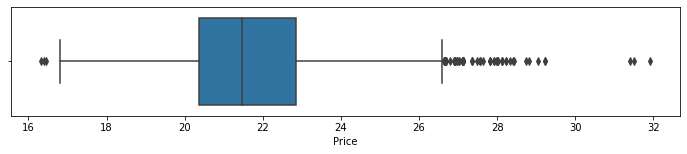

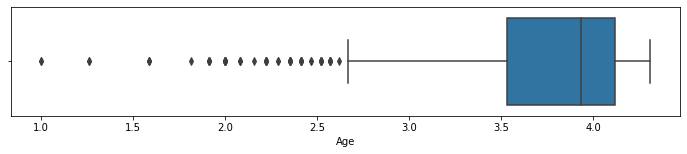

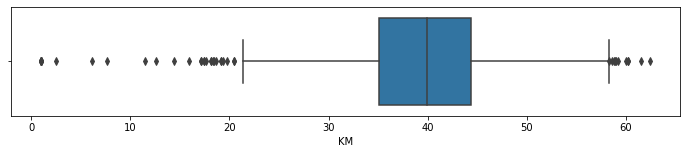

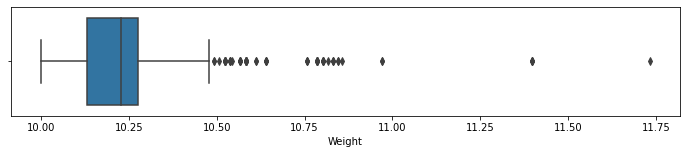

In [47]:
data4 = raw_data1.copy()
data4[continuous_features]=np.cbrt(data4[continuous_features])

plt.figure(figsize=(12,2))
sns.boxplot(x='Price',data=data4)
plt.figure(figsize=(12,2))
sns.boxplot(x='Age',data=data4)
plt.figure(figsize=(12,2))
sns.boxplot(x='KM',data=data4)
plt.figure(figsize=(12,2))
sns.boxplot(x='Weight',data=data4)
plt.show()

Build a model with Cube Root Transformations

In [48]:
model_cbrt = smf.ols("Price~Age+KM+Weight", data = data4).fit()

# Finding rsquared values
model_cbrt.rsquared , model_cbrt.rsquared_adj 

(0.8146046800585907, 0.8142160106247512)

In [49]:
# Finding accuracy
model_cbrt.rsquared , model_cbrt.aic

(0.8146046800585907, 3966.028885539272)

**3) Logarithmic Transformations**

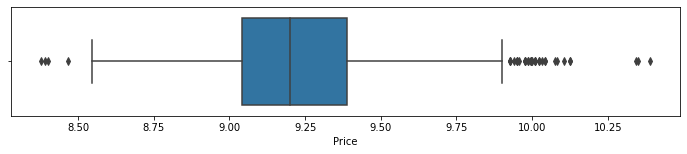

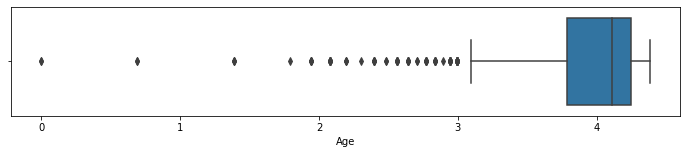

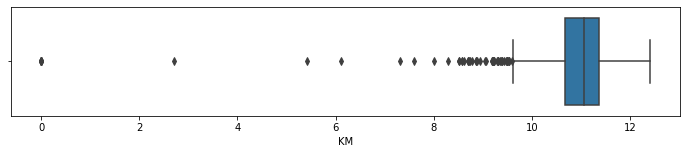

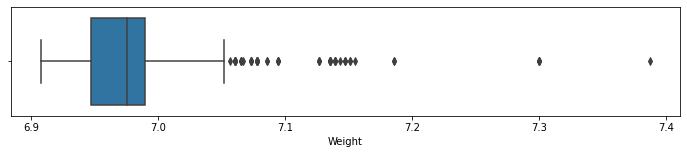

In [50]:
data5 = raw_data1.copy()
data5[continuous_features]=np.log(data5[continuous_features])

plt.figure(figsize=(12,2))
sns.boxplot(x='Price',data=data5)
plt.figure(figsize=(12,2))
sns.boxplot(x='Age',data=data5)
plt.figure(figsize=(12,2))
sns.boxplot(x='KM',data=data5)
plt.figure(figsize=(12,2))
sns.boxplot(x='Weight',data=data5)
plt.show()

Build a model with Logarithmic Transformations

In [51]:
model_log = smf.ols("Price~Age+KM+Weight", data = data5).fit()

# Finding rsquared values
model_log.rsquared , model_log.rsquared_adj 

(0.7069873404282618, 0.70637305812308)

In [52]:
# Finding accuracy
model_log.rsquared , model_log.aic

(0.7069873404282618, -1181.9800345119652)

After applying Transformations, the outliers are still present. And the performance is worse than the raw data model. So we discard the models.

#Raw data model after removing influecers

In [53]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(80, 78.72950582254255)

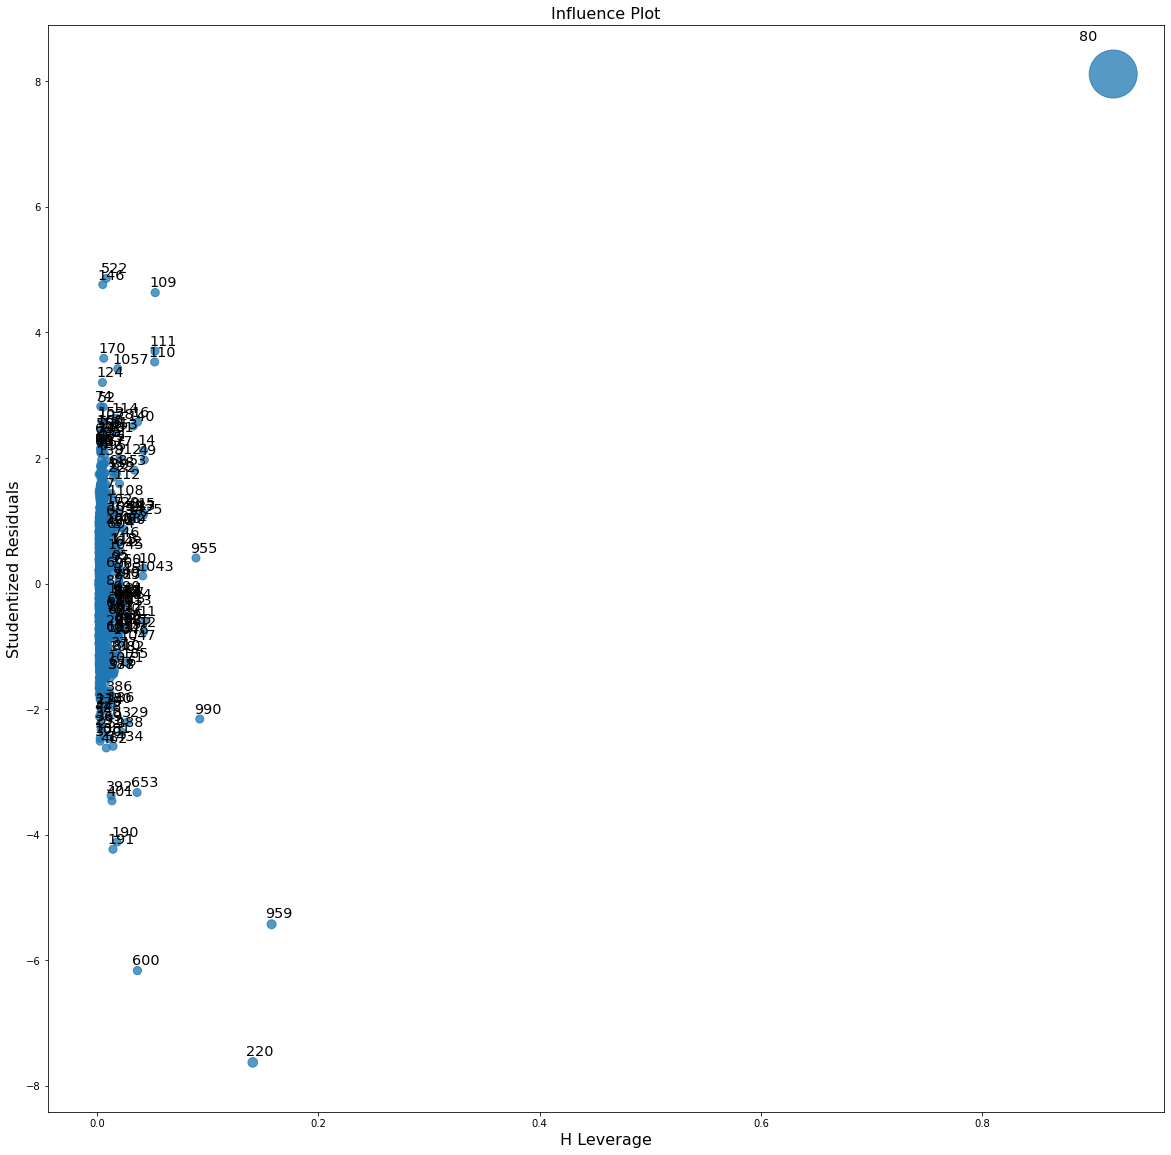

In [54]:
from statsmodels.graphics.regressionplots import influence_plot

fig,ax=plt.subplots(figsize=(20,20))
fig=influence_plot(model_raw,ax = ax)
plt.show()

In [55]:
k = raw_data1.shape[1]
n = raw_data1.shape[0]
leverage_cutoff = 3*((k + 1)/n)

In [56]:
raw_data1[raw_data1.index.isin([80])]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
80,18950,25,20019,110,16000,5,5,100,1180


In [57]:
#See the differences in all variable values
raw_data1.head()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


#Improving the Model

In [58]:
#Load the data 
raw_data_new = pd.read_csv('ToyotaCorolla.csv',encoding='latin1')

In [59]:
#Discard the data points which are influencers and reasign the row number (reset_index())
raw_data2 = raw_data_new.drop(raw_data_new.index[[80]],axis=0).reset_index()

In [60]:
#Drop the original index
raw_data2 = raw_data2.drop(['index'],axis=1)

In [61]:
raw_data2

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1430,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1431,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1432,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1433,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


#Build the Model

In [62]:
raw_data2 = raw_data_new.rename({'Age_08_04':'Age','cc':'CC','Quarterly_Tax':'QT'},axis=1)
raw_data2.head()

,Id,Model,Price,Age,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [63]:
while model_raw.rsquared < 0.90:
    for c in [np.max(c)>leverage_cutoff]:
        model_raw=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=raw_data2).fit()
        (c,_)=model_raw.get_influence().cooks_distance
        c
        np.argmax(c) , np.max(c)
        raw_data2=raw_data2.drop(raw_data2.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
        raw_data2
    else:
        final_model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=raw_data2).fit()
        final_model.rsquared , final_model.aic
        print("Model accuracy is improved to",final_model.rsquared)

Model accuracy is improved to 0.8693790488655819
Model accuracy is improved to 0.8778445878599779
Model accuracy is improved to 0.8851845904421739
Model accuracy is improved to 0.8894191849749752
Model accuracy is improved to 0.8914204825569462
Model accuracy is improved to 0.8921467826162199
Model accuracy is improved to 0.8934037497368835
Model accuracy is improved to 0.8944954473640403
Model accuracy is improved to 0.8958333530393431
Model accuracy is improved to 0.8966334481080778
Model accuracy is improved to 0.8941835374074522
Model accuracy is improved to 0.8951069956497651
Model accuracy is improved to 0.8965514940097825
Model accuracy is improved to 0.8971531368893259
Model accuracy is improved to 0.8979680072945878
Model accuracy is improved to 0.8975421185310548
Model accuracy is improved to 0.8970095523065387
Model accuracy is improved to 0.8965434597967322
Model accuracy is improved to 0.8961255789744986
Model accuracy is improved to 0.897264698289888
Model accuracy is imp

In [64]:
# Finding R_squared 
(final_model.rsquared,final_model.rsquared_adj)

(0.9003762532318559, 0.8997729300114583)

In [65]:
# Finding Accurary
(final_model.rsquared,final_model.aic)

(0.9003762532318559, 22093.157808007065)

Checking for influencers again with Cook's Distance

<ipython-input-66-d680c6ace667>:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(raw_data2)), np.round(c_V,3))


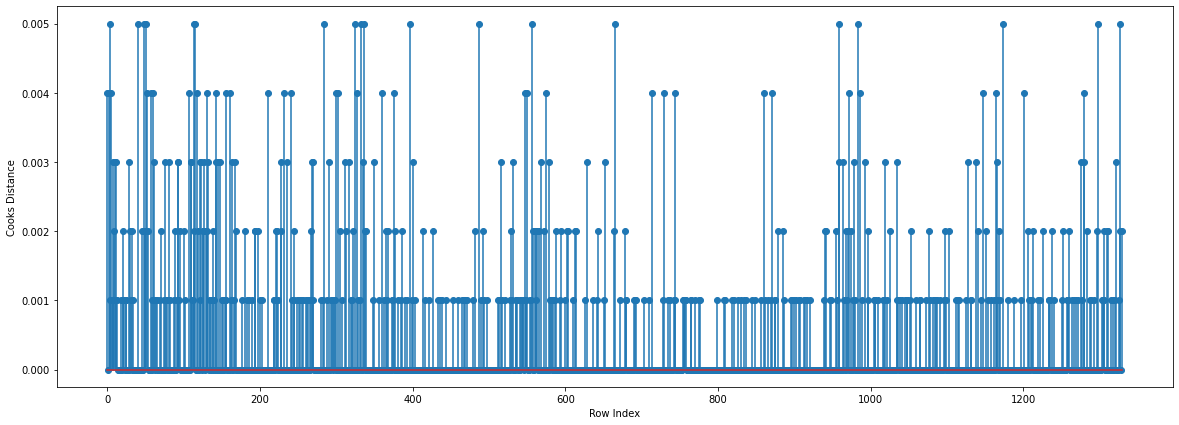

In [66]:
model_influence_V = final_model.get_influence()
(c_V, _) = model_influence_V.cooks_distance

fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(raw_data2)), np.round(c_V,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance');
plt.show()     

Hence now we can continue with this model.

#Applying Standard Scalar

In [67]:
# First lets consider only the columns which are to be considered for our model as given in the question
raw_data2 = raw_data2[["Price","Age","KM","HP","CC","Doors","Gears","QT","Weight"]]
raw_data.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [68]:
from sklearn.preprocessing import StandardScaler

col_names = raw_data2.columns
features = raw_data2[col_names]

scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
df_standard_scaled = pd.DataFrame(features, columns = col_names)
df_standard_scaled.head()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,1.057454,-1.915503,0.136289,-0.883769,2.526466,-1.067888,-0.137393,3.424789,2.456469
1,1.446875,-1.746462,-0.576515,-0.883769,2.526466,-1.067888,-0.137393,3.424789,2.456469
2,1.057454,-1.521074,-0.848065,-0.883769,2.526466,-1.067888,-0.137393,3.424789,2.580538
3,0.797839,-1.408380,-0.204921,-0.883769,2.526466,-1.067888,-0.137393,3.424789,2.580538
4,2.079684,-1.690115,0.755851,-0.883769,2.526466,-1.067888,-0.137393,3.424789,4.441570


In [69]:
model_ss = smf.ols("Price~Age+KM+HP+CC+Doors+Gears+QT+Weight", data = df_standard_scaled).fit()

# Finding r_squared
model_ss.rsquared, model_ss.rsquared_adj

(0.9003762532318559, 0.8997729300114583)

In [70]:
# Finding r_squared
model_ss.rsquared, model_ss.aic

(0.9003762532318559, 724.9247188058607)

As we can observe the accuracy of our standard scaled model has improved vastly.

**For building Multi Linear Resgression we need to check whether:**

1.   All the feature should be independent of each other.
2.   Constant Variance in error & should have Normaldistribution.
3.   Linear relation between the dependent variables and independent variables.




In [71]:
model_ss.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     1492.
Date:                Mon, 06 Feb 2023   Prob (F-statistic):               0.00
Time:                        12:29:13   Log-Likelihood:                -353.46
No. Observations:                1330   AIC:                             724.9
Df Residuals:                    1321   BIC:                             771.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.431e-17      0.009   1.65e-15      1.000      -0.017       0.017
Age           -0.6235      0.013    -49.648      0.000      -0.648      -0.599
KM            -0.1756      0.012    -14.830      0.000      -0.199      -0.152
HP             0.0325      0.013      2.586      0.010       0.008       0.057
CC            -0.1307      0.017     -7.799      0.000      -0.164      -0.098
Doors         -0.0462      0.010     -4.600      0.000      -0.066      -0.026
Gears          0.0138      0.009      1.537      0.124      -0.004       0.032
QT            -0.1368      0.019     -7.144      0.000      -0.174      -0.099
Weight         0.4836      0.019     25.566      0.000       0.446       0.521
==============================================================================
Omnibus:                        5.509   Durbin-Watson:                   1.826
Prob(Omnibus):                  0.064   Jarque-Bera (JB):                5.515
Skew:                           0.158   Prob(JB):                       0.0635
Kurtosis:                       2.993   Cond. No.                         4.64
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Lets find out regression between continuous variables.

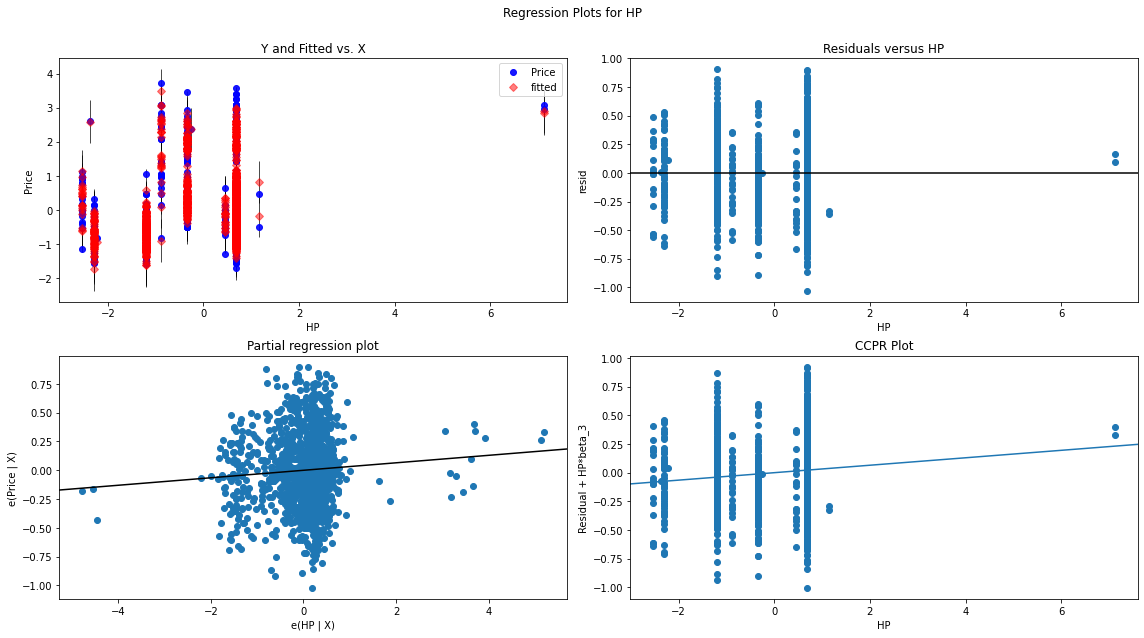

In [72]:
fig = plt.figure(figsize = (16,9))
sm.graphics.plot_regress_exog(model_ss, 'HP', fig=fig)
plt.show()

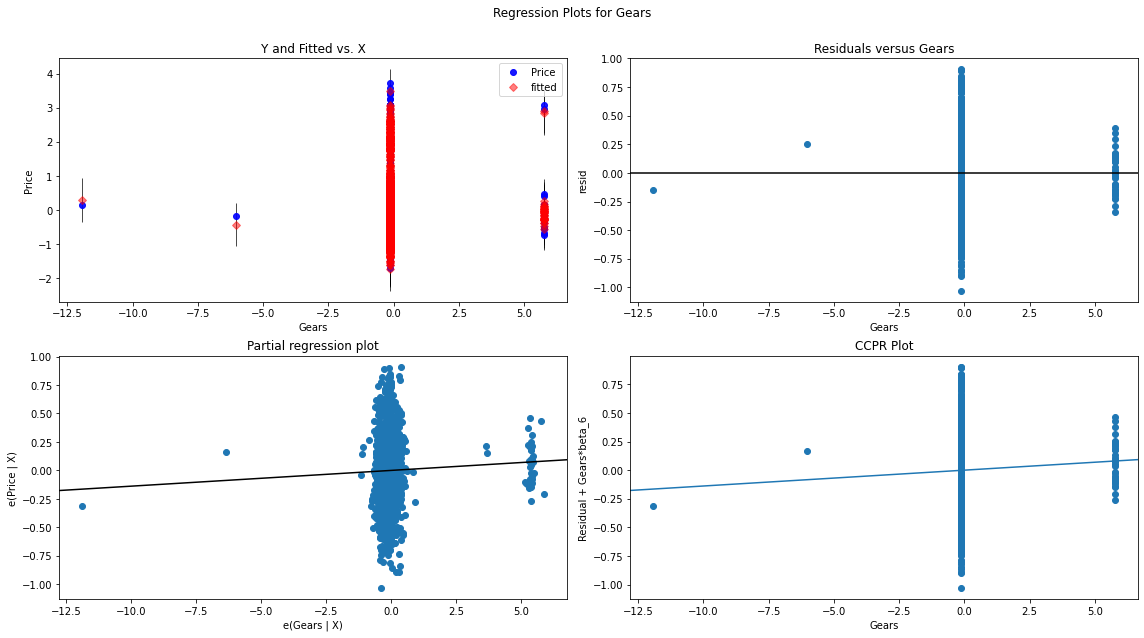

In [73]:
fig = plt.figure(figsize = (16,9))
sm.graphics.plot_regress_exog(model_ss, 'Gears', fig=fig)
plt.show()

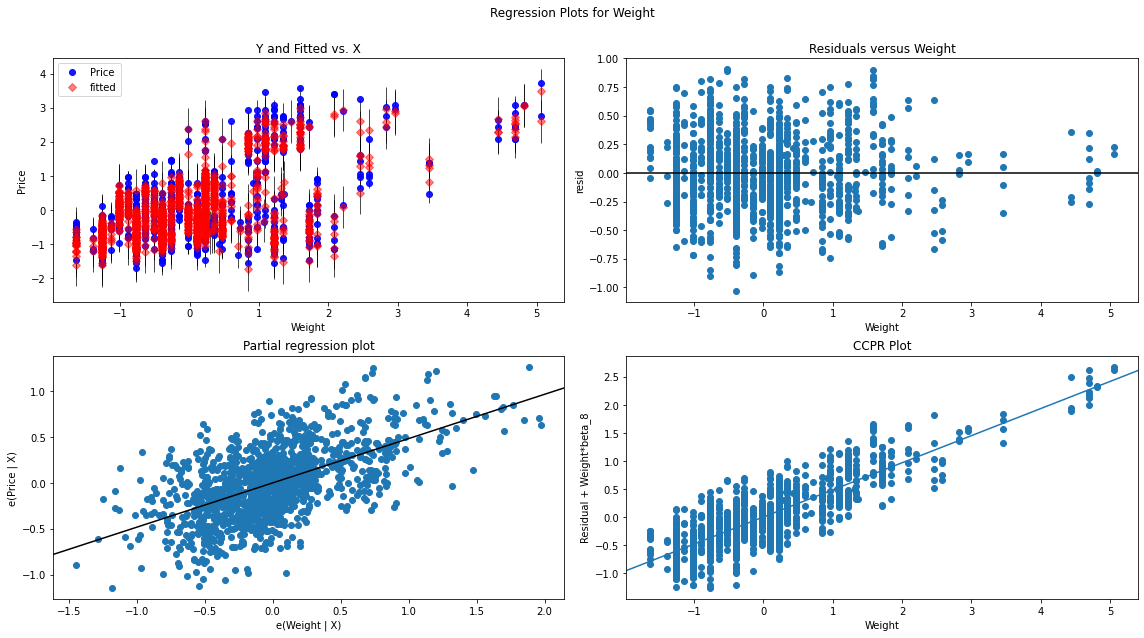

In [74]:
fig = plt.figure(figsize = (16,9))
sm.graphics.plot_regress_exog(model_ss, 'Weight', fig=fig)
plt.show()

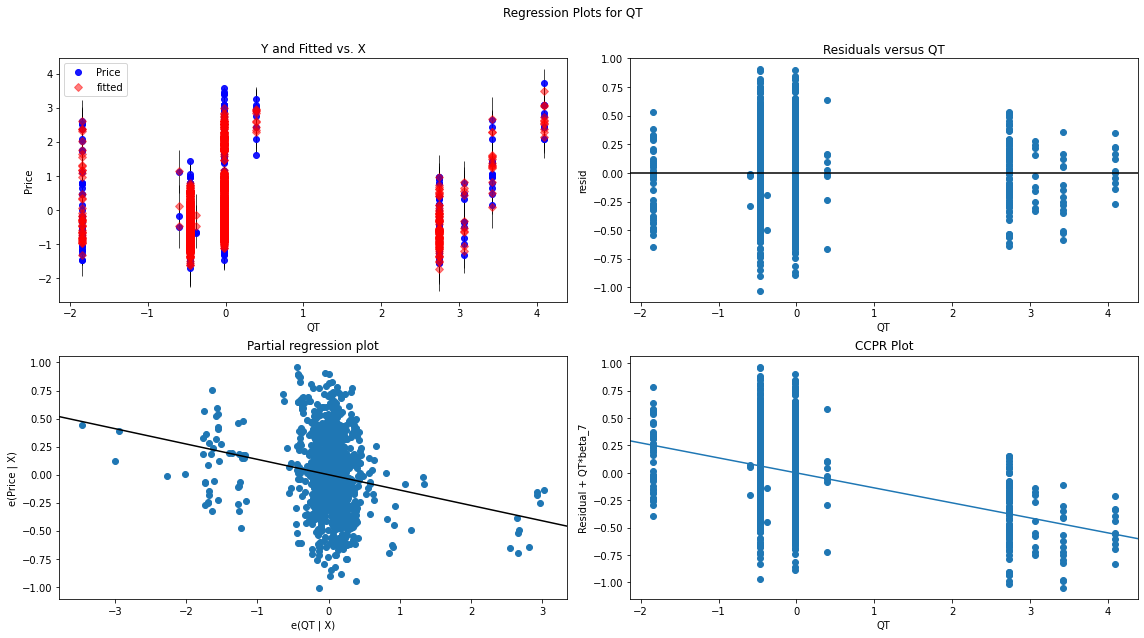

In [75]:
fig = plt.figure(figsize = (16,9))
sm.graphics.plot_regress_exog(model_ss, 'QT', fig=fig)
plt.show()

Hence, No Linear Relation found in QT Feature with the Dependent feature.

#Calculating VIF for each feature

In [76]:
raw_data2.columns

Index(['Price', 'Age', 'KM', 'HP', 'CC', 'Doors', 'Gears', 'QT', 'Weight'], dtype='object')

In [77]:
rsq_age = smf.ols('Age~KM+HP+CC+Doors+Gears+QT+Weight',data=raw_data2).fit().rsquared
vif_age = 1/(1-rsq_age)

rsq_km = smf.ols('KM~Age+HP+CC+Doors+Gears+QT+Weight',data=raw_data2).fit().rsquared
vif_km = 1/(1-rsq_km)

rsq_hp = smf.ols('HP~KM+Age+CC+Doors+Gears+QT+Weight',data=raw_data2).fit().rsquared
vif_hp = 1/(1-rsq_hp)

rsq_cc = smf.ols('CC~KM+HP+Age+Doors+Gears+QT+Weight',data=raw_data2).fit().rsquared
vif_cc = 1/(1-rsq_cc)

rsq_doors = smf.ols('Doors~KM+HP+CC+Age+Gears+QT+Weight',data=raw_data2).fit().rsquared
vif_doors = 1/(1-rsq_doors)

rsq_gears = smf.ols('Gears~KM+HP+CC+Doors+Age+QT+Weight',data=raw_data2).fit().rsquared
vif_gears = 1/(1-rsq_gears)

rsq_qt = smf.ols('QT~KM+HP+CC+Doors+Gears+Age+Weight',data=raw_data2).fit().rsquared
vif_qt = 1/(1-rsq_qt)

rsq_weight = smf.ols('Weight~KM+HP+CC+Doors+Gears+QT+Age',data=raw_data2).fit().rsquared
vif_weight = 1/(1-rsq_weight)


# Storing vif values in a data frame
vif = {'Variables':['Age', 'KM', 'HP', 'CC', 'Doors', 'Gears', 'QT', 'Weight'],'VIF':[vif_age,vif_km,vif_hp,vif_cc,vif_doors,vif_gears,vif_qt,vif_weight]}
vif_frame = pd.DataFrame(vif)
vif_frame

,Variables,VIF
0,Age,2.091177
1,KM,1.858592
2,HP,2.094861
3,CC,3.725960
4,Doors,1.336868
5,Gears,1.075124
6,QT,4.863714
7,Weight,4.744228


Generally we take VIF that is less than 5. So we consider Gears & QT.

In [78]:
#Simple Linear Model using QT
model_qt = smf.ols('Price~QT', data=df_standard_scaled).fit()
model_qt.rsquared, model_qt.rsquared_adj, model_qt.aic

(0.018133278236668326, 0.01739392076546109, 3754.03789591831)

In [79]:
#Simple Linear Model using Gears
model_gears = smf.ols('Price~Gears', data=df_standard_scaled).fit()
model_gears.rsquared, model_gears.rsquared_adj, model_gears.aic

(6.256890518130387e-05, -0.000690396027871909, 3778.2932790770415)

In [80]:
#Simple Linear Model using Gears+QT
model_qt_gears = smf.ols('Price~Gears+QT', data=df_standard_scaled).fit()
model_qt_gears.rsquared, model_qt_gears.rsquared_adj, model_qt_gears.aic

(0.01820597774553001, 0.01672625804356398, 3755.9394162322183)

Here, Gears is highly correlated and insignificant variable.

In [81]:
# Dropping Gears

x = df_standard_scaled.drop(['Gears'], axis=1)
y = df_standard_scaled.drop(['Gears','Price'], axis=1)

x.columns

Index(['Price', 'Age', 'KM', 'HP', 'CC', 'Doors', 'QT', 'Weight'], dtype='object')

In [82]:
model_new = smf.ols('Price~Age+KM+HP+CC+Doors+QT+Weight', data = x).fit()

# Finding R_squared and Accuracy
model_new.rsquared, model_new.rsquared_adj, model_new.aic

(0.9001980293966753, 0.8996695772073989, 725.3019223783963)

Lets analyse Root Mean Squared Error (RMSE) between the model’s predicted target value and actual target value.

In [83]:
from sklearn.metrics import mean_squared_error

x = raw_data2[['Age','KM','HP','CC','Doors','QT','Weight']]
y = raw_data2[['Price']]
x_transform = StandardScaler().fit(x)
y_transform = StandardScaler().fit(y)
# Scale the test dataset
x_train_scaled = x_transform.transform(x)
y_train_scaled = y_transform.transform(y)

# Linear Regression
x_df = pd.DataFrame(x_train_scaled, columns = ['Age','KM','HP','CC','Doors','QT','Weight'])
x_df.head()

# Predict with the trained model
predict = pd.DataFrame(model_new.predict(x_df))

# Inverse transform the prediction
predict_unscaled = y_transform.inverse_transform(predict.values.reshape(-1,1))

# Predicting RMSE the Test set results
rmse_linear= (np.sqrt(mean_squared_error(y, predict_unscaled)))
print('R_squared : ', model_new.rsquared)
print('R2_squared_adjusted : ', model_new.rsquared_adj)
print("RMSE : ", rmse_linear)

R_squared :  0.9001980293966753
R2_squared_adjusted :  0.8996695772073989
RMSE :  973.4891302578


Square-Root Transformation

In [84]:
sqrt_scaled = pd.DataFrame()
sqrt_scaled['Age'] = np.sqrt(raw_data2.Age)
sqrt_scaled['Price'] = np.sqrt(raw_data2.Price)
sqrt_scaled['KM'] = np.sqrt(raw_data2.KM)
sqrt_scaled['Weight'] = np.sqrt(raw_data2.Weight)
sqrt_scaled['CC'] = raw_data2['CC']
sqrt_scaled['QT'] = raw_data2['QT']
sqrt_scaled['Doors'] = raw_data2['Doors']
sqrt_scaled['Gears'] = raw_data2['Gears']
sqrt_scaled['HP'] = raw_data2['HP']
sqrt_scaled.head()

,Age,Price,KM,Weight,CC,QT,Doors,Gears,HP
0,4.795832,117.260394,270.068510,34.132096,2000,210,3,5,90
1,5.099020,122.270193,219.089023,34.132096,2000,210,3,5,90
2,5.477226,117.260394,196.214169,34.205263,2000,210,3,5,90
3,5.656854,113.798067,246.981781,34.205263,2000,210,3,5,90
4,5.196152,130.000000,307.590637,35.284558,2000,210,3,5,90


In [85]:
sqrt_transformed_model = smf.ols("Price~Age+KM+HP+CC+Doors+Gears+QT+Weight", data = sqrt_scaled).fit()

Cube Root Transformation

In [86]:
cbrt_scaled = pd.DataFrame()
cbrt_scaled['Age'] = np.cbrt(raw_data2.Age)
cbrt_scaled['Price'] = np.cbrt(raw_data2.Price)
cbrt_scaled['KM'] = np.cbrt(raw_data2.KM)
cbrt_scaled['Weight'] = np.cbrt(raw_data2.Weight)
cbrt_scaled['CC'] = raw_data2['CC']
cbrt_scaled['QT'] = raw_data2['QT']
cbrt_scaled['Doors'] = raw_data2['Doors']
cbrt_scaled['Gears'] = raw_data2['Gears']
cbrt_scaled['HP'] = raw_data2['HP']
cbrt_scaled.head()

,Age,Price,KM,Weight,CC,QT,Doors,Gears,HP
0,2.843867,23.957099,41.781366,10.522251,2000,210,3,5,90
1,2.962496,24.634688,36.342412,10.522251,2000,210,3,5,90
2,3.107233,23.957099,33.766567,10.537282,2000,210,3,5,90
3,3.174802,23.483163,39.364972,10.537282,2000,210,3,5,90
4,3.000000,25.662299,45.566822,10.757791,2000,210,3,5,90


In [87]:
cbrt_transformed_model = smf.ols("Price~Age+KM+HP+CC+Doors+Gears+QT+Weight", data = cbrt_scaled).fit()

Logarithmic Transformation

In [88]:
log_scaled = pd.DataFrame()
log_scaled['Age'] = np.log(raw_data2.Age)
log_scaled['Price'] = np.log(raw_data2.Price)
log_scaled['KM'] = np.log(raw_data2.KM)
log_scaled['Weight'] = np.log(raw_data2.Weight)
log_scaled['CC'] = raw_data2['CC']
log_scaled['QT'] = raw_data2['QT']
log_scaled['Doors'] = raw_data2['Doors']
log_scaled['Gears'] = raw_data2['Gears']
log_scaled['HP'] = raw_data2['HP']
log_scaled.head()

,Age,Price,KM,Weight,CC,QT,Doors,Gears,HP
0,3.135494,9.528794,11.197351,7.060476,2000,210,3,5,90
1,3.258097,9.612467,10.778956,7.060476,2000,210,3,5,90
2,3.401197,9.528794,10.558414,7.064759,2000,210,3,5,90
3,3.465736,9.468851,11.018629,7.064759,2000,210,3,5,90
4,3.295837,9.735069,11.457540,7.126891,2000,210,3,5,90


In [89]:
log_transformed_model = smf.ols("Price~Age+KM+HP+CC+Doors+Gears+QT+Weight", data = log_scaled).fit()

In [90]:
square_root_pred_y = np.square(sqrt_transformed_model.predict(sqrt_scaled[['Age','Weight','KM','HP','CC','QT','Doors','Gears']]))
cube_root_pred_y = pow(cbrt_transformed_model.predict(cbrt_scaled[['Age','Weight','KM','HP','CC','QT','Doors','Gears']]),3)
log_model_pred_y = np.exp(log_transformed_model.predict(log_scaled[['Age','Weight','KM','HP','CC','QT','Doors','Gears']]))

In [91]:
sqrt_rmse = np.sqrt(mean_squared_error(raw_data2['Price'], square_root_pred_y))
cbrt_rmse = np.sqrt(mean_squared_error(raw_data2['Price'], cube_root_pred_y))
log_rmse = np.sqrt(mean_squared_error(raw_data2['Price'], log_model_pred_y))

In [92]:
print('Raw Model=', np.sqrt(model_raw.mse_resid),
      '\n''After Removing Influencers=', np.sqrt(final_model.mse_resid),
      '\n''After Log Transformation on both Model=', log_rmse,
      '\n''After Cube-root Transformation on both Model=', cbrt_rmse,
     '\n''After Sqaure Root Transformation on both Model=', sqrt_rmse,
      '\n''After Removing Influencers from model', np.sqrt(final_model.mse_resid),
     '\n''Final Model without Multicollinearity Model=', rmse_linear)

Raw Model= 976.7658733249547 
After Removing Influencers= 975.9271399262796 
After Log Transformation on both Model= 1801.159126340264 
After Cube-root Transformation on both Model= 1152.5577948742432 
After Sqaure Root Transformation on both Model= 1010.8979447569398 
After Removing Influencers from model 975.9271399262796 
Final Model without Multicollinearity Model= 973.4891302578


#Build the final model

In [93]:
data6 = raw_data2.copy()
x.insert(loc=0, column='Price', value=data6.Price)

In [94]:
x.columns

Index(['Price', 'Age', 'KM', 'HP', 'CC', 'Doors', 'QT', 'Weight'], dtype='object')

In [95]:
model_final = smf.ols("Price~Age+KM+HP+CC+Doors+QT+Weight", data = x).fit()
# Finding rsquared values
model_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     1703.
Date:                Mon, 06 Feb 2023   Prob (F-statistic):               0.00
Time:                        12:29:17   Log-Likelihood:                -11039.
No. Observations:                1330   AIC:                         2.209e+04
Df Residuals:                    1322   BIC:                         2.214e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -1.75e+04   1319.793    -13.257      0.000   -2.01e+04   -1.49e+04
Age         -108.2237      2.182    -49.609      0.000    -112.503    -103.944
KM            -0.0154      0.001    -14.750      0.000      -0.017      -0.013
HP             8.7091      2.987      2.915      0.004       2.849      14.570
CC            -2.3113      0.291     -7.955      0.000      -2.881      -1.741
Doors       -159.3409     31.769     -5.016      0.000    -221.663     -97.018
QT           -11.4610      1.624     -7.057      0.000     -14.647      -8.275
Weight        37.0835      1.445     25.656      0.000      34.248      39.919
==============================================================================
Omnibus:                        4.861   Durbin-Watson:                   1.824
Prob(Omnibus):                  0.088   Jarque-Bera (JB):                4.872
Skew:                           0.148   Prob(JB):                       0.0875
Kurtosis:                       2.984   Cond. No.                     3.78e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.78e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#Residual Analysis

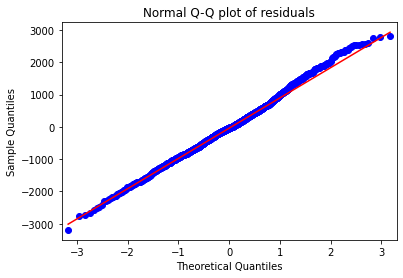

In [96]:
sm.qqplot(model_final.resid, line = 'q')
plt.title('Normal Q-Q plot of residuals')
plt.show()

In [97]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

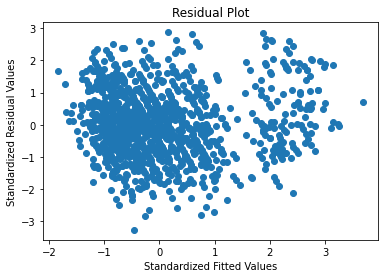

In [98]:
plt.scatter(get_standardized_values(model_final.fittedvalues),
            get_standardized_values(model_final.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residual Values')
plt.show()

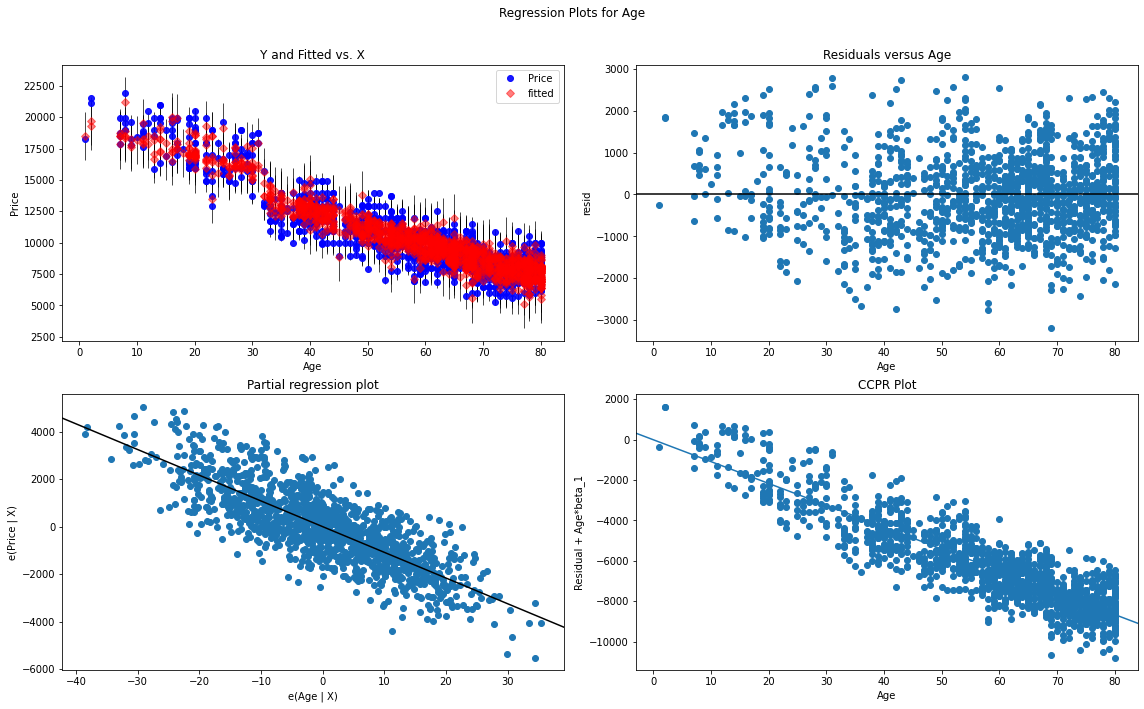

In [99]:
fig = plt.figure(figsize = (16,10))
sm.graphics.plot_regress_exog(model_final, 'Age', fig=fig)
plt.show()

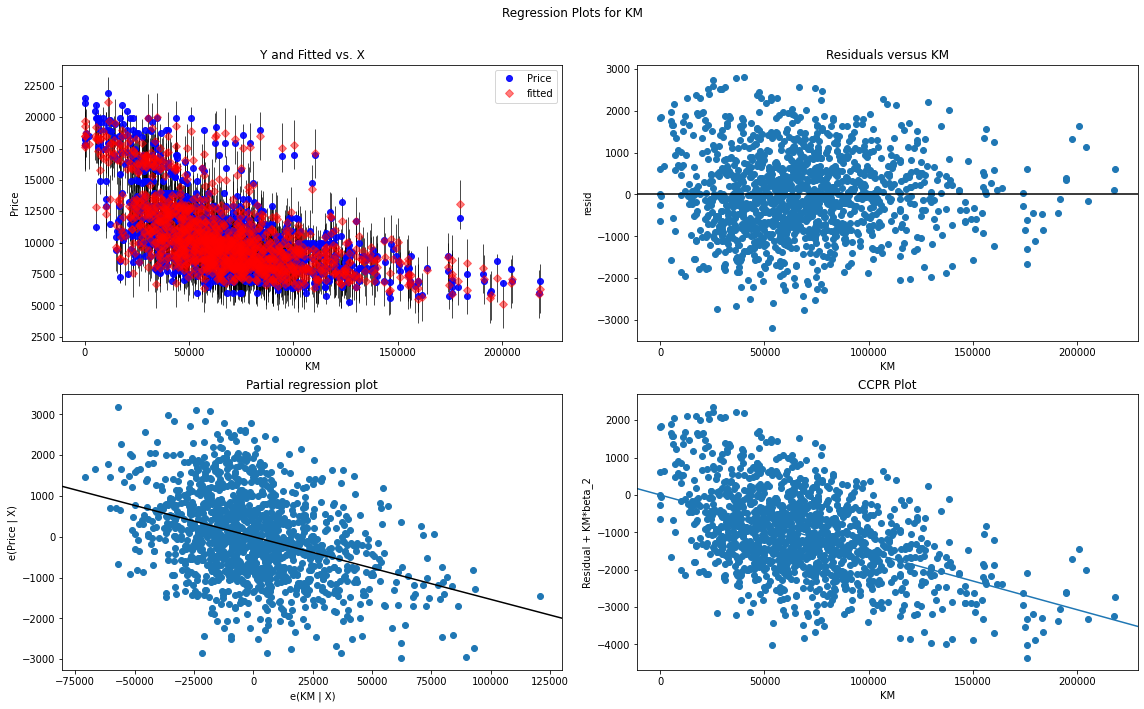

In [100]:
fig = plt.figure(figsize = (16,10))
sm.graphics.plot_regress_exog(model_final, 'KM', fig=fig)
plt.show()

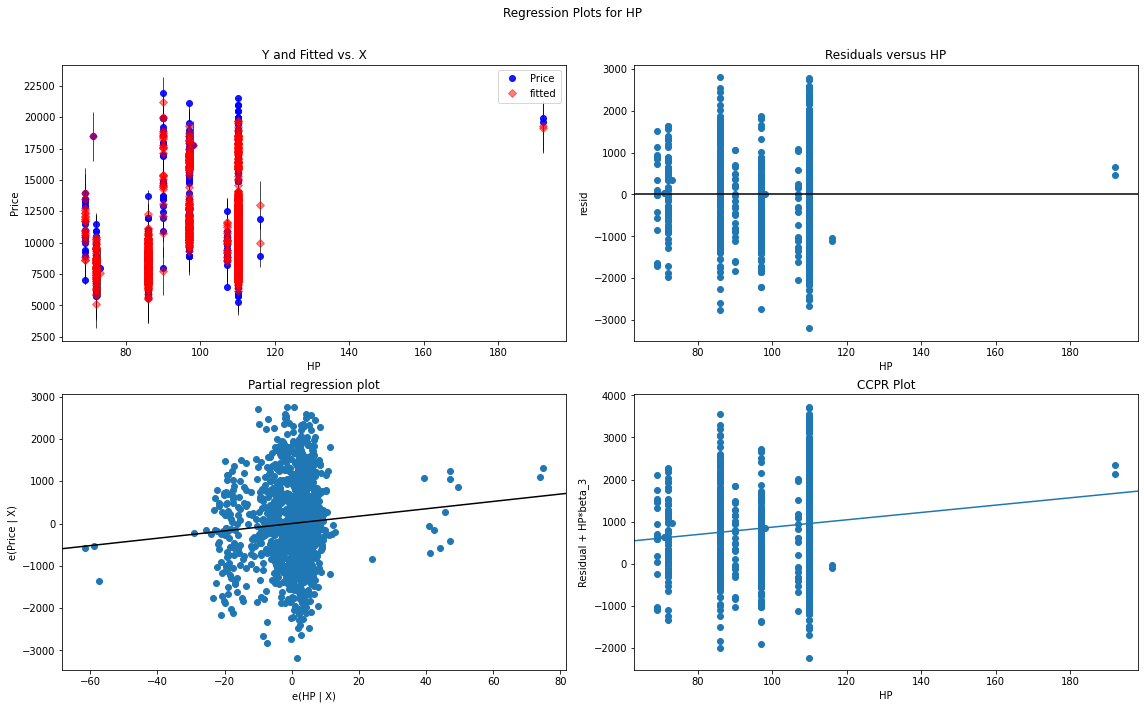

In [101]:
fig = plt.figure(figsize = (16,10))
sm.graphics.plot_regress_exog(model_final, 'HP', fig=fig)
plt.show()

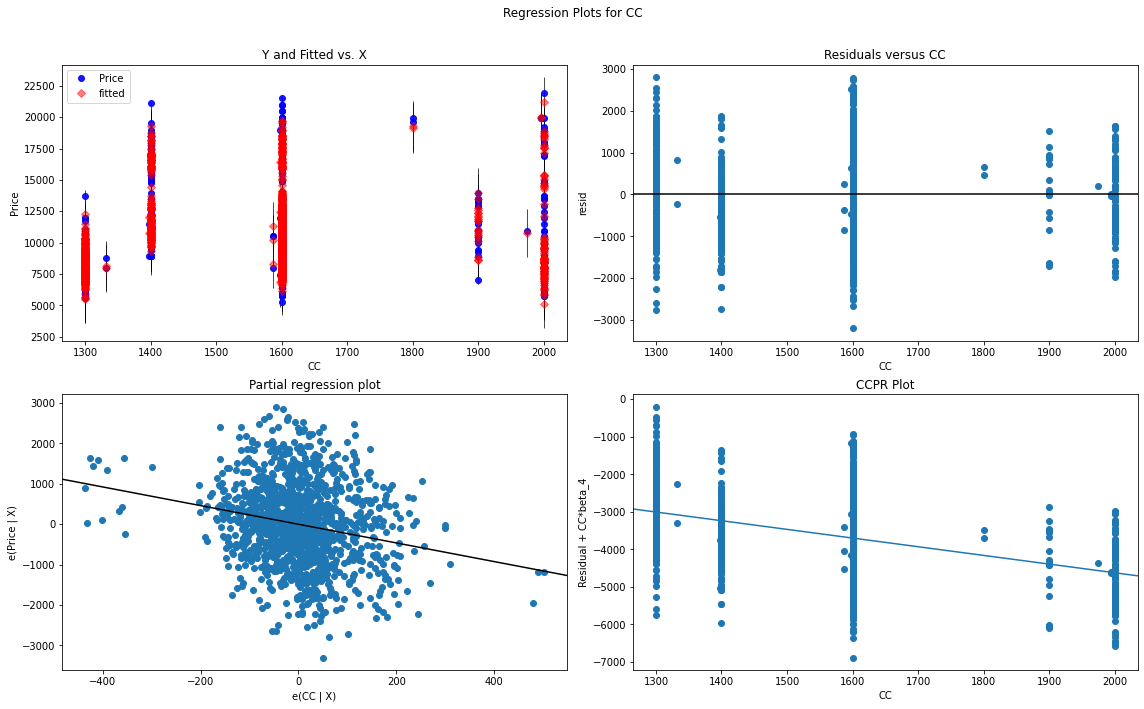

In [102]:
fig = plt.figure(figsize = (16,10))
sm.graphics.plot_regress_exog(model_final, 'CC', fig=fig)
plt.show()

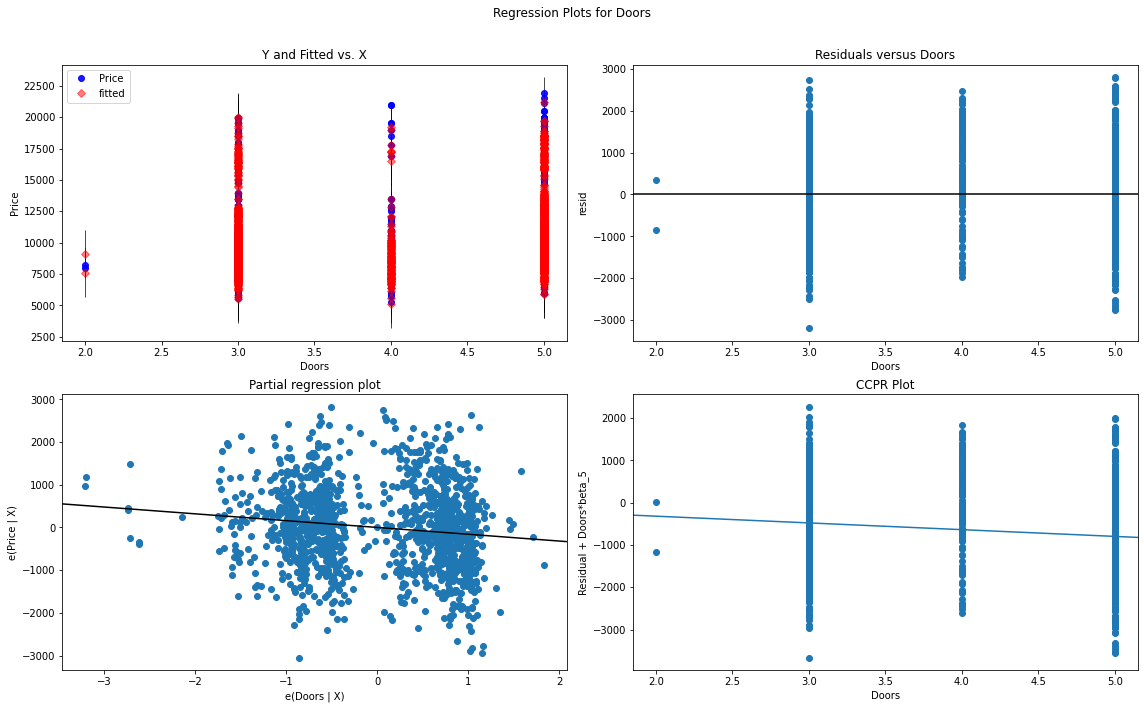

In [103]:
fig = plt.figure(figsize = (16,10))
sm.graphics.plot_regress_exog(model_final, 'Doors', fig=fig)
plt.show()

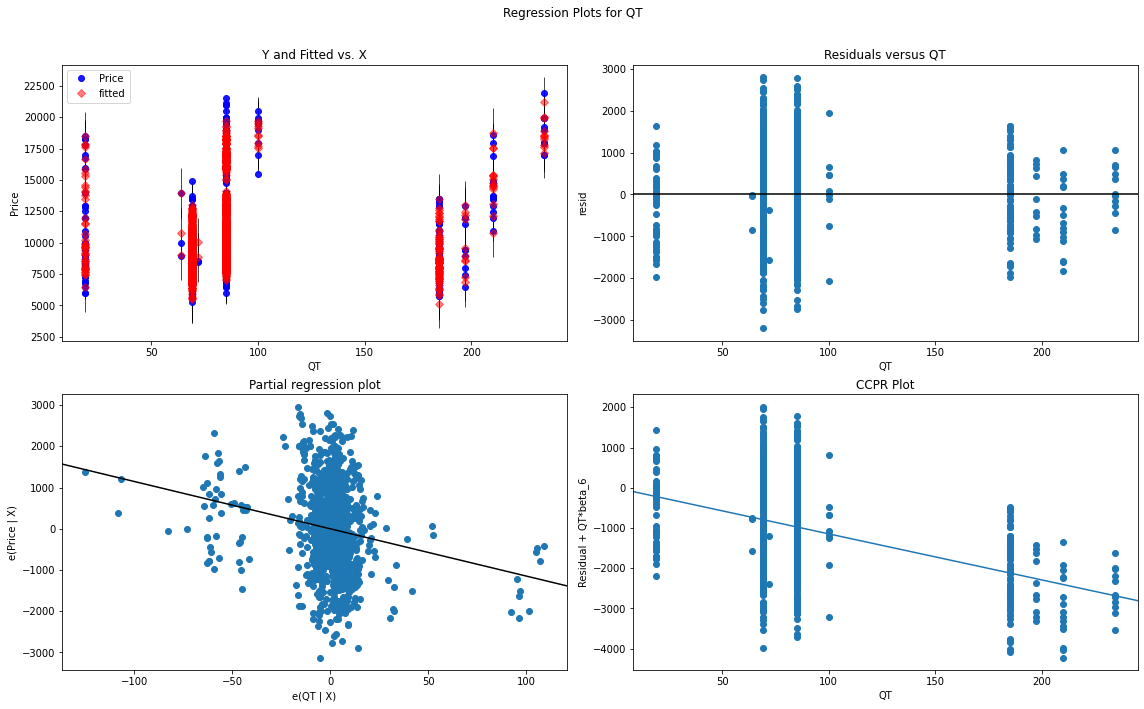

In [104]:
fig = plt.figure(figsize = (16,10))
sm.graphics.plot_regress_exog(model_final, 'QT', fig=fig)
plt.show()

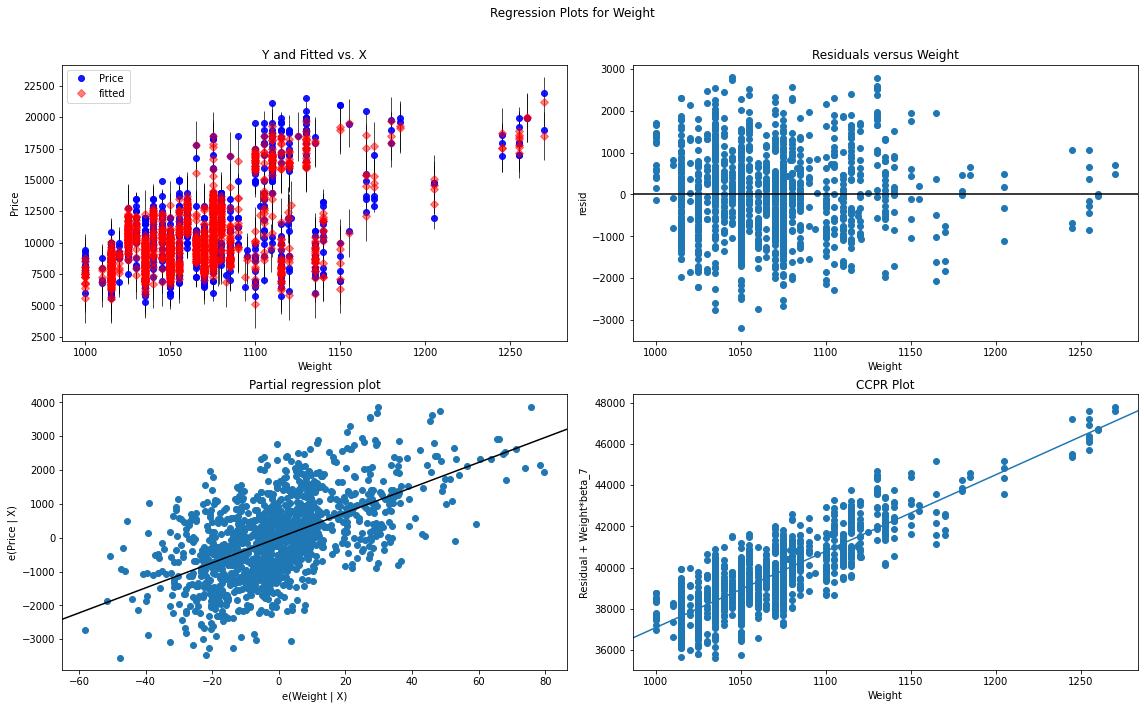

In [105]:
fig = plt.figure(figsize = (16,10))
sm.graphics.plot_regress_exog(model_final, 'Weight', fig=fig)
plt.show()

As we can see only KM and Age has a linear relation with the Price.

#Predicting values from Model using same dataset

In [128]:
# Lets predict with a new test data
new_data=pd.DataFrame({'Age':13,"KM":60000,"HP":74,"CC":2398,"Doors":5,"Gears":5,"QT":93,"Weight":1200},index=[0])
new_data

,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13,60000,74,2398,5,5,93,1200


In [129]:
# Manual Prediction of Price
model_final.predict(new_data)

0    17915.176197
dtype: float64

In [130]:
# Prediction of Price with 90.02% accurcy
pred = model_final.predict(raw_data2)
pred

0       15373.394865
1       15431.540514
2       15329.901138
3       14768.048428
4       17574.438664
            ...     
1325     7607.786001
1326     9206.784055
1327     8534.980688
1328     8673.661428
1329     8783.420224
Length: 1330, dtype: float64

#Preparing a table containing R^2 value for each prepared model

In [115]:
models={'Different_Models':['Raw_data_Model','Removed_Influencers_Model','Sqaure_Root_Transformation_Model','Cube-root_Transformation_Model','Log Transformation_Model','Final_Model_without_Multicollinearity_Model'],
        'R_squared':[model_raw.rsquared,final_model.rsquared,model_sqrt.rsquared,model_cbrt.rsquared,model_log.rsquared,model_final.rsquared],
        'R_squared_adjusted':[model_raw.rsquared_adj,final_model.rsquared_adj,model_sqrt.rsquared_adj,model_cbrt.rsquared_adj,model_log.rsquared_adj,model_final.rsquared_adj],
       'RMSE':[np.sqrt(model_raw.mse_resid),np.sqrt(final_model.mse_resid),sqrt_rmse,cbrt_rmse,log_rmse,rmse_linear],
       'Accuracy':[model_raw.aic,final_model.aic,model_sqrt.aic,model_cbrt.aic,model_log.aic,model_final.aic]}
model_table=pd.DataFrame(models)
model_table

,Different_Models,R_squared,R_squared_adjusted,RMSE,Accuracy
0,Raw_data_Model,0.900224,0.899620,976.765873,22112.049283
1,Removed_Influencers_Model,0.900376,0.899773,975.927140,22093.157808
2,Sqaure_Root_Transformation_Model,0.842223,0.841892,1010.897945,9393.896771
3,Cube-root_Transformation_Model,0.814605,0.814216,1152.557795,3966.028886
4,Log Transformation_Model,0.706987,0.706373,1801.159126,-1181.980035
5,Final_Model_without_Multicollinearity_Model,0.900198,0.899670,973.489130,22093.535012


Text(0.5, 1.0, 'Comparision of R^2 values for each prepared model\n')

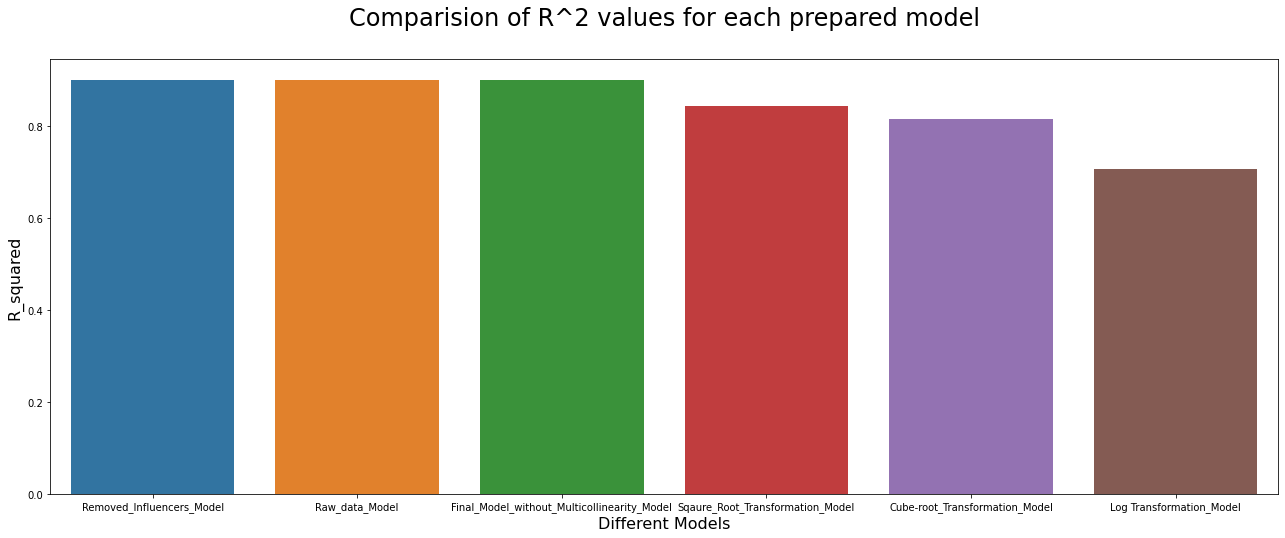

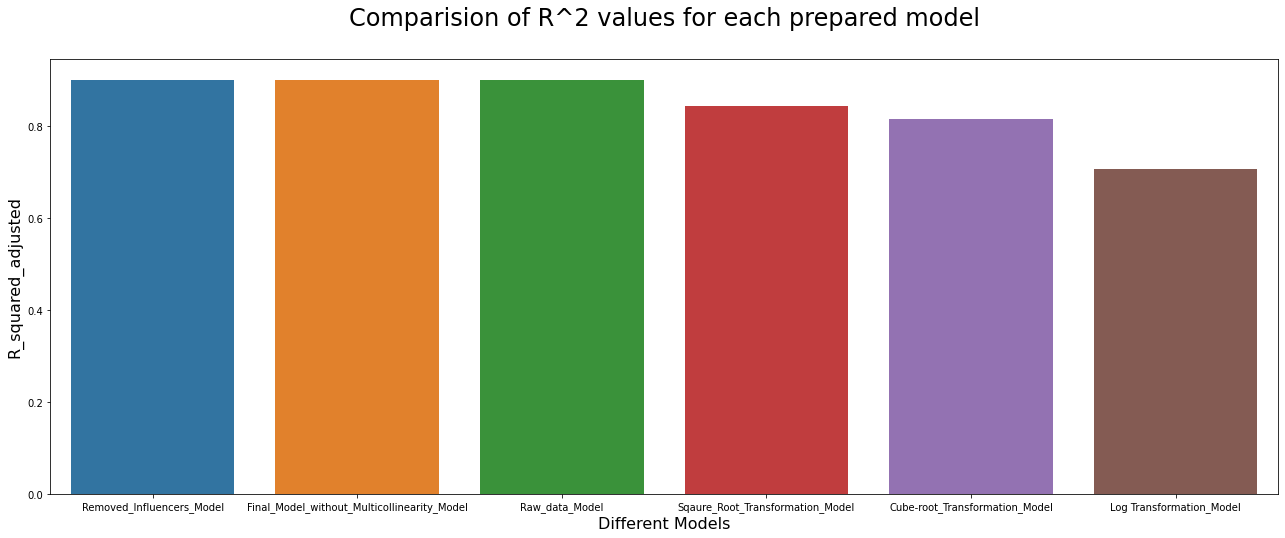

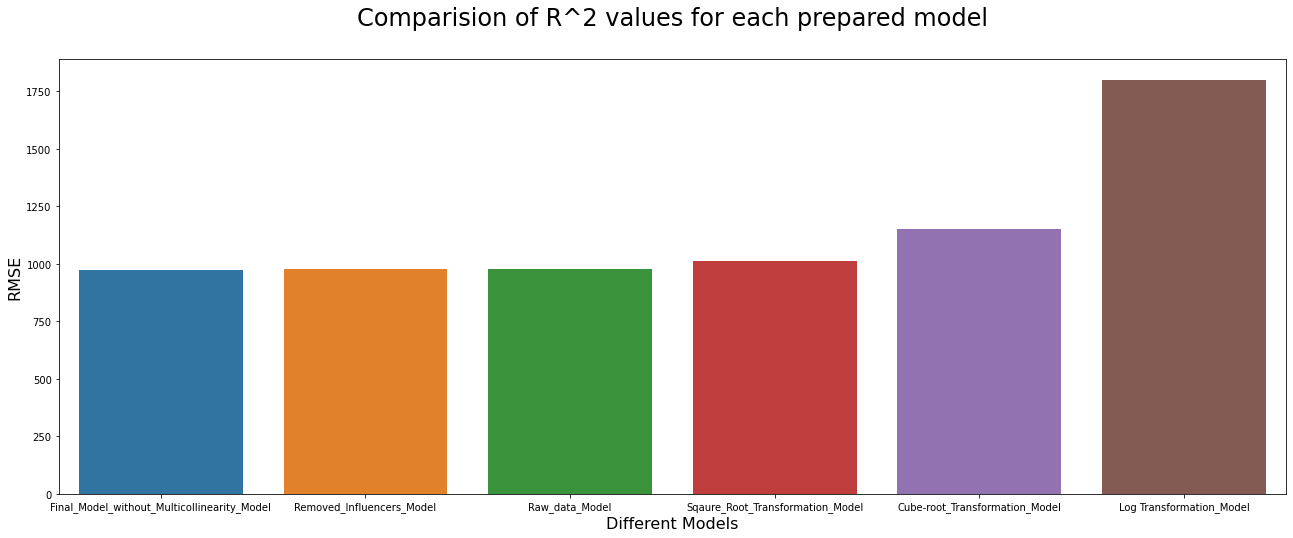

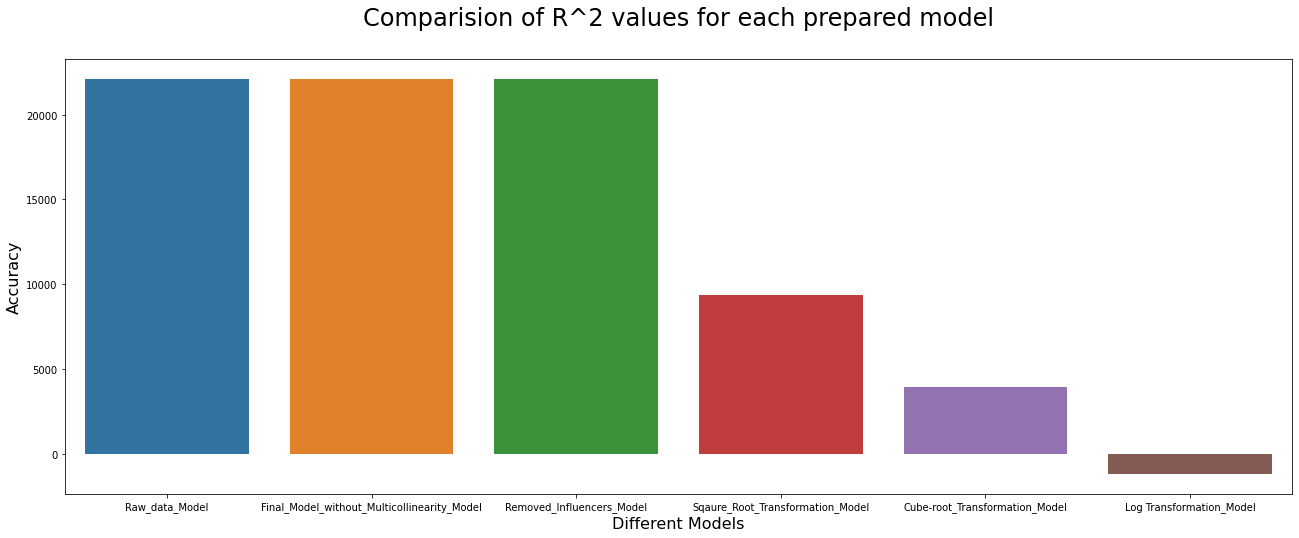

In [117]:
model_table.sort_values(by=['R_squared'], ascending=False, inplace=True)

f, axes = plt.subplots(1,1, figsize=(22,8))
sns.barplot(x='Different_Models', y='R_squared', data=model_table, ax = axes)
axes.set_xlabel('Different Models', size=16)
axes.set_ylabel('R_squared', size=16)
plt.title('Comparision of R^2 values for each prepared model\n', size = 24)

model_table.sort_values(by=['R_squared_adjusted'], ascending=False, inplace=True)

f, axes = plt.subplots(1,1, figsize=(22,8))
sns.barplot(x='Different_Models', y='R_squared_adjusted', data=model_table, ax = axes)
axes.set_xlabel('Different Models', size=16)
axes.set_ylabel('R_squared_adjusted', size=16)
plt.title('Comparision of R^2 values for each prepared model\n', size = 24)

model_table.sort_values(by=['RMSE'], ascending=True, inplace=True)

f, axes = plt.subplots(1,1, figsize=(22,8))
sns.barplot(x='Different_Models', y='RMSE', data=model_table, ax = axes)
axes.set_xlabel('Different Models', size=16)
axes.set_ylabel('RMSE', size=16)
plt.title('Comparision of R^2 values for each prepared model\n', size = 24)

model_table.sort_values(by=['Accuracy'], ascending=False, inplace=True)

f, axes = plt.subplots(1,1, figsize=(22,8))
sns.barplot(x='Different_Models', y='Accuracy', data=model_table, ax = axes)
axes.set_xlabel('Different Models', size=16)
axes.set_ylabel('Accuracy', size=16)
plt.title('Comparision of R^2 values for each prepared model\n', size = 24)

#**Hence, we can conclude that Removed_Influencers_Model is the best fit model for the given data in terms of R^2, RMSE & accuracy.**